In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

In [ ]:

df = pd.read_csv(r"athlete_events.csv")


In [ ]:
print(df['NOC'].nunique())
print(df['NOC'])

In [ ]:
df['Sport']

 e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse,

In [ ]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].std())

In [ ]:
df = df.fillna({'Age': 0, 'Height': 0, 'Weight': 0, 'ID': 0})
df = df.astype({'Age': 'uint8', 'Height': 'uint8', 'Weight': 'uint8', 'ID': 'uint32' , 'Year': 'int16'})
df.info()

In [ ]:
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'red'])

In [ ]:

gender_year_season = df.groupby(['Season', 'Year', 'Sex']).size().unstack(fill_value=0)


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

gender_year_season.loc['Summer'].plot(ax=axes[0], marker='o')
axes[0].set_title('Summer OS')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Nbr of athletes')
axes[0].legend()
axes[0].grid(True)

gender_year_season.loc['Winter'].plot(ax=axes[1], marker='o')
axes[1].set_title('Winter OS')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
df.groupby('NOC')['Medal'].count().sort_values(ascending=False).iloc[:10].plot.bar()

# ITALIA

In [ ]:
italydf = df[df['NOC'] == 'ITA']
italydf

In [ ]:

#Skapar en Name_HASH kolumn med den anonymiserade namn
italydf.insert(loc=2, column="Name_HASH", value = italydf["Name"].apply( lambda x:
                                             hashlib.sha256(x.encode()).hexdigest()
                                             ))

#Skapar en anonym version av df utan namn-kolumn
italydf_anon = italydf.drop(["Name"], axis=1)



In [ ]:
italydf_anon

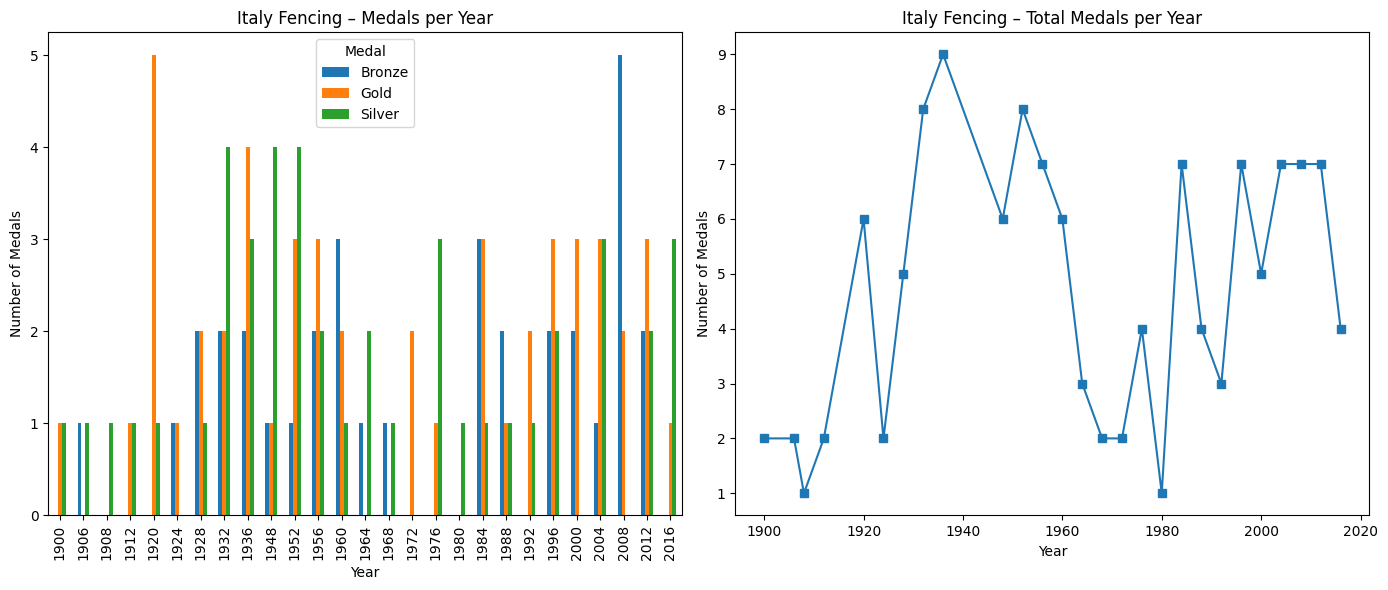

In [79]:

italy_fencing = italydf_anon[italydf_anon["Sport"] == "Fencing"].copy()


medals = italy_fencing[italy_fencing["Medal"].notna()].copy()


unique_medals = medals.drop_duplicates(subset=["Year", "Event", "Medal"])


medals_by_type = unique_medals.pivot_table(
    index="Year",
    columns="Medal",
    values="ID",
    aggfunc="count"
).fillna(0)  # pivot makes NaN so fill with 0:s

medals_total = medals_by_type.sum(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

medals_by_type.plot.bar(ax=axes[0])
axes[0].set_title("Italy Fencing – Medals per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Medals")

medals_total.plot(kind="line", ax=axes[1], marker="s")
axes[1].set_title("Italy Fencing – Total Medals per Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Medals")


plt.tight_layout()
plt.show()